<a href="https://colab.research.google.com/github/Jorge-89/Serie-Temporal/blob/main/Serie_Temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal

In [1]:
# importo librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras


In [2]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Serie-Temporal/main/temp_junio.csv'
df = pd.read_csv(url, sep=";", skiprows=1,header=None,index_col=0, squeeze=True,names=['fecha','unidades'])

df.head()




fecha
1/6/2013    10.66
2/6/2013     9.86
3/6/2013     7.98
4/6/2013    11.72
5/6/2013    12.80
Name: unidades, dtype: float64

In [3]:
len(df)

240

In [4]:
#colocando la fecha ocmo indice podemos rapidamente tener valores de fechas maximos o minimos
	
print(df.index.min())
print(df.index.max())


1/6/2013
9/6/2020


In [3]:

PASOS=10

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# load dataset
values = df.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()


,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
10,0.619351,0.576821,0.476874,0.675704,0.733121,0.502392,0.471558,0.570973,0.683679,0.629452,0.659755
11,0.576821,0.476874,0.675704,0.733121,0.502392,0.471558,0.570973,0.683679,0.629452,0.659755,0.844763
12,0.476874,0.675704,0.733121,0.502392,0.471558,0.570973,0.683679,0.629452,0.659755,0.844763,0.882509
13,0.675704,0.733121,0.502392,0.471558,0.570973,0.683679,0.629452,0.659755,0.844763,0.882509,0.653907
14,0.733121,0.502392,0.471558,0.570973,0.683679,0.629452,0.659755,0.844763,0.882509,0.653907,0.612972


In [4]:

p_train = 0.90 
values = reframed.values
train = values[:int((len(values))*p_train)] 
test = values[int((len(values))*p_train):]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)


(207, 1, 10) (207,) (23, 1, 10) (23,)


In [62]:
test

array([[0.40776175, 0.42105255, 0.30037206, 0.30356184, 0.29292923,
        0.48856983, 0.521531  , 0.5295055 , 0.32110572, 0.342371  ,
        0.4614566 ],
       [0.42105255, 0.30037206, 0.30356184, 0.29292923, 0.48856983,
        0.521531  , 0.5295055 , 0.32110572, 0.342371  , 0.4614566 ,
        0.5396065 ],
       [0.30037206, 0.30356184, 0.29292923, 0.48856983, 0.521531  ,
        0.5295055 , 0.32110572, 0.342371  , 0.4614566 , 0.5396065 ,
        0.5433279 ],
       [0.30356184, 0.29292923, 0.48856983, 0.521531  , 0.5295055 ,
        0.32110572, 0.342371  , 0.4614566 , 0.5396065 , 0.5433279 ,
        0.5257841 ],
       [0.29292923, 0.48856983, 0.521531  , 0.5295055 , 0.32110572,
        0.342371  , 0.4614566 , 0.5396065 , 0.5433279 , 0.5257841 ,
        0.634237  ],
       [0.48856983, 0.521531  , 0.5295055 , 0.32110572, 0.342371  ,
        0.4614566 , 0.5396065 , 0.5433279 , 0.5257841 , 0.634237  ,
        0.43062195],
       [0.521531  , 0.5295055 , 0.32110572, 0.342371  , 0.

In [23]:
y_val

array([0.70228595, 0.5943646 , 0.39074954, 0.39819238, 0.48378512,
       0.40457195, 0.3902179 , 0.3540669 , 0.6512493 , 0.5470494 ,
       0.74534816, 0.73684204, 0.36257303, 0.1653375 , 0.29399246,
       0.40776175, 0.42105255, 0.30037206, 0.30356184, 0.29292923,
       0.48856983, 0.521531  , 0.5295055 , 0.32110572, 0.342371  ,
       0.4614566 , 0.5396065 , 0.5433279 , 0.5257841 , 0.634237  ,
       0.43062195, 0.35513017, 0.38064852, 0.58851665, 0.71026045,
       0.6161616 , 0.59223807, 0.47421575, 0.56512487, 0.4481658 ,
       0.5358851 , 0.5007974 , 0.40297708, 0.4082934 , 0.20042522,
       0.35566178, 0.30887818, 0.47208923], dtype=float32)

In [24]:
x_val

array([[[0.5491759 , 0.76714504, 0.69271654]],

       [[0.76714504, 0.69271654, 0.70228595]],

       [[0.69271654, 0.70228595, 0.5943646 ]],

       [[0.70228595, 0.5943646 , 0.39074954]],

       [[0.5943646 , 0.39074954, 0.39819238]],

       [[0.39074954, 0.39819238, 0.48378512]],

       [[0.39819238, 0.48378512, 0.40457195]],

       [[0.48378512, 0.40457195, 0.3902179 ]],

       [[0.40457195, 0.3902179 , 0.3540669 ]],

       [[0.3902179 , 0.3540669 , 0.6512493 ]],

       [[0.3540669 , 0.6512493 , 0.5470494 ]],

       [[0.6512493 , 0.5470494 , 0.74534816]],

       [[0.5470494 , 0.74534816, 0.73684204]],

       [[0.74534816, 0.73684204, 0.36257303]],

       [[0.73684204, 0.36257303, 0.1653375 ]],

       [[0.36257303, 0.1653375 , 0.29399246]],

       [[0.1653375 , 0.29399246, 0.40776175]],

       [[0.29399246, 0.40776175, 0.42105255]],

       [[0.40776175, 0.42105255, 0.30037206]],

       [[0.42105255, 0.30037206, 0.30356184]],

       [[0.30037206, 0.30356184, 0.29292

In [5]:
#Defino la función neuronal
def define_model():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    
   
    return model

In [6]:
model = define_model()
# Hago una corrida sin metodo de regularizacion.  
history = model.fit(epochs=100, batch_size=32, x=x_train, y=y_train, validation_data=(x_val, y_val) )
#                     callbacks=[early,])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 10)             110       
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 0.3888 - mse: 0.2328 - val_loss: 0.2162 - val_mse: 0.0654
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.2978 - mse: 0.1578 - val_loss: 0.1230 - val_mse: 0.0236
Epoch 3/100
7/7 [==============================] - 0s 4ms/step 

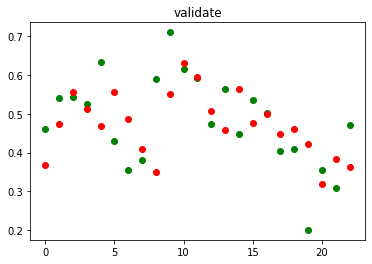

In [7]:

results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()


In [37]:
results

array([[0.35491425],
       [0.46752796],
       [0.5395644 ],
       [0.5273041 ],
       [0.48652583],
       [0.55703384],
       [0.4577911 ],
       [0.38842124],
       [0.37472427],
       [0.5465293 ],
       [0.62532073],
       [0.5714417 ],
       [0.5226484 ],
       [0.44898027],
       [0.5341158 ],
       [0.46404967],
       [0.50504214],
       [0.47676748],
       [0.43472573],
       [0.43228123],
       [0.2745427 ],
       [0.39962712],
       [0.3749001 ]], dtype=float32)

In [13]:
y_val

array([0.342371  , 0.4614566 , 0.5396065 , 0.5433279 , 0.5257841 ,
       0.634237  , 0.43062195, 0.35513017, 0.38064852, 0.58851665,
       0.71026045, 0.6161616 , 0.59223807, 0.47421575, 0.56512487,
       0.4481658 , 0.5358851 , 0.5007974 , 0.40297708, 0.4082934 ,
       0.20042522, 0.35566178, 0.30887818, 0.47208923], dtype=float32)

In [8]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[ 6.15651931],
       [ 7.39936364],
       [ 8.6283958 ],
       [ 8.74011188],
       [ 8.35690498],
       [ 9.40944865],
       [ 8.07121798],
       [ 6.76184886],
       [ 6.34208586],
       [ 8.66483585],
       [10.45995853],
       [10.01312448],
       [ 9.20953849],
       [ 8.02511182],
       [ 8.80235214],
       [ 7.84346373],
       [ 8.26683015],
       [ 8.07823982],
       [ 7.55601987],
       [ 7.28686219],
       [ 5.4543532 ],
       [ 6.31379891],
       [ 6.25177503]])

In [8]:
ultimosDias = df['16/6/2020':'30/6/2020']


In [9]:

values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[10]], axis=1, inplace=True)
reframed.head(122)

,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
10,0.522419,1.000000,0.630866,0.537018,0.074035,0.430657,-0.028154,0.315954,0.178311,-0.205422
11,1.000000,0.630866,0.537018,0.074035,0.430657,-0.028154,0.315954,0.178311,-0.205422,-0.184567
12,0.630866,0.537018,0.074035,0.430657,-0.028154,0.315954,0.178311,-0.205422,-0.184567,-1.000000
13,0.537018,0.074035,0.430657,-0.028154,0.315954,0.178311,-0.205422,-0.184567,-1.000000,-0.391032
14,0.074035,0.430657,-0.028154,0.315954,0.178311,-0.205422,-0.184567,-1.000000,-0.391032,-0.574557


In [10]:
values = reframed.values
x_test = values[4:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[ 0.07403541,  0.4306569 , -0.02815425,  0.3159542 ,
          0.17831087, -0.20542228, -0.18456721, -1.        ,
         -0.39103234, -0.5745568 ]]], dtype=float32)

In [11]:

def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(10):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 0.07403541  0.4306569  -0.02815425  0.3159542   0.17831087
   -0.20542228 -0.18456721 -1.         -0.39103234 -0.5745568 ]]]
[[[ 0.4306569  -0.02815425  0.3159542   0.17831087 -0.20542228
   -0.18456721 -1.         -0.39103234 -0.5745568  -0.3822905 ]]]
[[[-0.02815425  0.3159542   0.17831087 -0.20542228 -0.18456721
   -1.         -0.39103234 -0.5745568  -0.3822905  -0.08582158]]]
[[[ 0.3159542   0.17831087 -0.20542228 -0.18456721 -1.
   -0.39103234 -0.5745568  -0.3822905  -0.08582158 -0.25376385]]]
[[[ 0.17831087 -0.20542228 -0.18456721 -1.         -0.39103234
   -0.5745568  -0.3822905  -0.08582158 -0.25376385  0.01971765]]]
[[[-0.20542228 -0.18456721 -1.         -0.39103234 -0.5745568
   -0.3822905  -0.08582158 -0.25376385  0.01971765  0.04988877]]]
[[[-0.18456721 -1.         -0.39103234 -0.5745568  -0.3822905
   -0.08582158 -0.25376385  0.01971765  0.04988877  0.14332317]]]
[[[-1.         -0.39103234 -0.5745568  -0.3822905  -0.08582158
   -0.25376385  0.01971765  0.04988877  0.14

In [12]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[5.74191688],
       [7.16348544],
       [6.35820221],
       [7.66954603],
       [7.81421656],
       [8.26223449],
       [9.19779113],
       [8.47123494],
       [9.03593732],
       [8.80530198]])

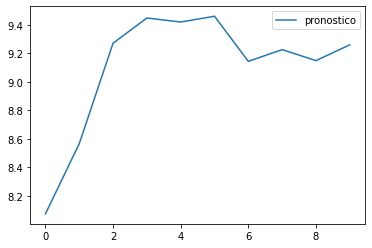

In [16]:

prediccion1SemanaDiciembre = pd.DataFrame(inverted)
prediccion1SemanaDiciembre.columns = ['pronostico']
prediccion1SemanaDiciembre.plot()
prediccion1SemanaDiciembre.to_csv('pronostico.csv')

In [ ]:
x_train

array([[236., 237., 290., ..., 128., 293., 260.],
       [237., 290., 221., ..., 293., 260., 204.],
       [290., 221., 128., ..., 260., 204., 157.],
       ...,
       [234., 322., 230., ..., 298., 277., 387.],
       [322., 230., 102., ..., 277., 387., 305.],
       [230., 102., 298., ..., 387., 305., 263.]], dtype=float32)

In [ ]:
lr = linear_model.LinearRegression()



#Entreno el modelo
lr.fit(x_train, y_train)



LinearRegression()

In [ ]:
#Realizo una predicción
y_pred = lr.predict(x_val)
y_pred

array([252.55136, 274.21872, 304.83032, 292.12192, 259.41248, 225.65733,
       276.57068, 270.56042, 248.46129, 233.23325, 214.06833, 228.07278,
       297.7396 , 329.10532, 368.8314 , 351.9118 , 253.41724, 266.7266 ,
       320.92923, 287.38385, 275.0271 , 301.86978, 285.91882, 237.23279,
       327.3092 , 331.60477, 291.8076 , 274.99506, 265.3982 , 221.13269,
       293.63177, 313.04874, 331.0174 , 280.77444, 344.19177, 328.2297 ,
       283.60703, 290.5661 , 291.96793, 238.01587, 273.7226 , 300.07977,
       278.39337, 255.25647, 280.98407, 266.86392, 190.98909, 238.65674,
       261.63245, 236.9474 , 266.24863, 248.11282, 204.58426, 238.17067,
       226.97758, 212.93813, 224.43639, 234.72728, 208.8552 , 254.09828,
       235.82571, 221.7568 , 212.77538, 196.75716, 169.06587, 235.68398,
       256.84436, 244.60135, 235.65727, 256.67963, 229.71257, 171.31337,
       244.61292, 255.48784, 244.6922 , 235.68929, 211.03157, 164.75278,
       207.92398, 213.13705, 194.0341 , 210.23898, 

In [ ]:
y_val

array([344., 286., 284., 258., 189., 170., 346., 363., 471., 399., 186.,
       305., 362., 296., 308., 354., 285., 158., 438., 365., 317., 310.,
       259., 169., 390., 301., 407., 214., 461., 332., 296., 331., 321.,
       188., 342., 298., 295., 258., 342., 296., 101., 291., 276., 219.,
       326., 242., 171., 280., 221., 210., 235., 248., 156., 313., 228.,
       247., 216., 184., 113., 298., 226., 271., 242., 319., 213.,  82.,
       307., 258., 276., 245., 214.,  84., 272., 203., 182., 224., 135.,
       240., 222., 219., 153., 248., 122., 226., 189., 196., 209., 230.,
       171.,  62., 252., 220., 296.,  65., 213.,  96., 275., 201., 165.,
       163., 202., 101., 241., 181., 229., 219., 152., 111., 207., 206.,
       183., 200., 187., 189.,  76., 276., 220., 183., 251., 189.],
      dtype=float32)